/var/folders/ql/dklml2ln7dnf6l874y2q745w0000gn/T/ipykernel_27949/3935385260.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_districts['centroid'] = filtered_districts.geometry.centroid
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

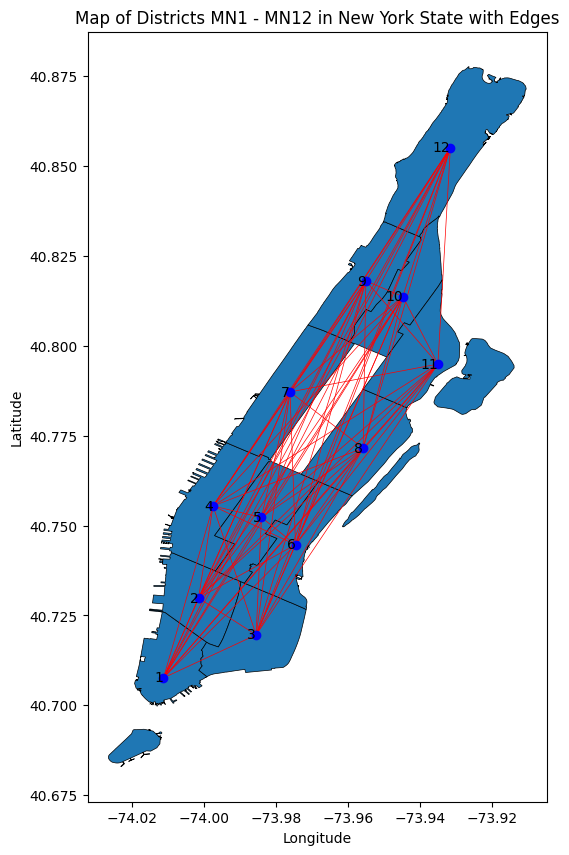

[[       inf 0.02424742 0.02840813 0.04974431 0.05230154 0.05215594
  0.08696743 0.08467145 0.12393056 0.12521927 0.11594484 0.16768245]
 [0.02424742        inf 0.01900946 0.02591198 0.02845796 0.03078461
  0.06272012 0.06193879 0.09973296 0.10129429 0.09309941 0.14353035]
 [0.02840813 0.01900946        inf 0.03778633 0.03271249 0.02736145
  0.06822429 0.05987564 0.10307356 0.1025619  0.0907124  0.14589185]
 [0.04974431 0.02591198 0.03778633        inf 0.01383501 0.02534436
  0.03827749 0.04475957 0.07567646 0.07861909 0.07396436 0.11955775]
 [0.05230154 0.02845796 0.03271249 0.01383501        inf 0.0121512
  0.03578255 0.03422803 0.07189486 0.07292468 0.06501021 0.11548441]
 [0.05215594 0.03078461 0.02736145 0.02534436 0.0121512         inf
  0.04252891 0.03280816 0.0759436  0.07520061 0.06397471 0.11854854]
 [0.08696743 0.06272012 0.06822429 0.03827749 0.03578255 0.04252891
         inf 0.02566213 0.0373993  0.0410948  0.04186887 0.08128227]
 [0.08467145 0.06193879 0.05987564 0.04475

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, LineString

# Load the shapefile for New York State (adjust path to your shapefile location)
# Example: "ny.shp"
ny_districts = gpd.read_file("new/ny.shp")

# Filter districts MN1 through MN12
filtered_districts = ny_districts[ny_districts['district'].isin(['MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10', 'MN11', 'MN12'])]

# Calculate the central point of every district
filtered_districts['centroid'] = filtered_districts.geometry.centroid

# Create a mapping from MN01-MN12 to 1-12
district_mapping = {district: int(district[2:]) for district in filtered_districts['district'].unique()}

# Apply the mapping to the 'district' column and sort by the new numbers
filtered_districts['new_district_id'] = filtered_districts['district'].map(district_mapping)
filtered_districts = filtered_districts.sort_values(by='new_district_id')

# Create a array for the list of edges
edges = []

# Add all the edges
for i in range(len(filtered_districts)):
    for j in range(i+1, len(filtered_districts)):
        # Calculate the distance between two edges
        line = LineString([filtered_districts['centroid'].iloc[i], filtered_districts['centroid'].iloc[j]])
        edges.append(line)



# create a matrix



num_districts = len(filtered_districts)
adjacency_matrix = np.inf * np.ones((num_districts, num_districts))

# calculate distance for the matrix
for i in range(num_districts):
    for j in range(num_districts):
        if i != j:
            distance = filtered_districts['centroid'].iloc[i].distance(filtered_districts['centroid'].iloc[j])
            adjacency_matrix[i, j] = distance
# convert edges into GeoDataFrame

edges_gdf = gpd.GeoDataFrame(geometry=edges)

# plot
filtered_districts.plot(figsize=(10, 10), edgecolor="black", linewidth=0.5)

# Draw edges
edges_gdf.plot(ax=plt.gca(), edgecolor='red', linewidth=0.5)


# display the number of district
for idx, row in filtered_districts.iterrows():
    plt.text(row['centroid'].x, row['centroid'].y, str(row['new_district_id']), ha='right', va='center', color='black')

# 标记中心点
for idx, row in filtered_districts.iterrows():
    plt.plot(row['centroid'].x, row['centroid'].y, 'bo')  # 使用蓝色圆点标记中心点

plt.title("Map of Districts MN1 - MN12 in New York State with Edges")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print(adjacency_matrix)

# Plot the filtered districts
# filtered_districts.plot(figsize=(10, 10), edgecolor="black", linewidth=0.5)
# plt.title("Map of Districts MN1 - MN12 in New York State")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

/var/folders/ql/dklml2ln7dnf6l874y2q745w0000gn/T/ipykernel_27949/538910344.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_districts['centroid'] = filtered_districts.geometry.centroid
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

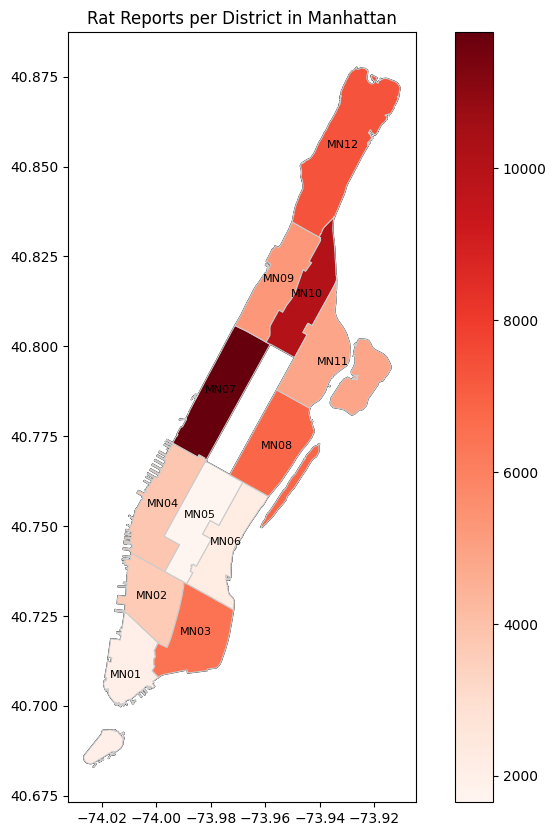

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

# Load the shapefile for New York State districts (adjust path as necessary)
ny_districts = gpd.read_file("new/ny.shp")

# Filter for Manhattan districts MN01 through MN12
filtered_districts = ny_districts[ny_districts['district'].isin(
    ['MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10', 'MN11', 'MN12'])]

# Calculate the central point (centroid) of each district
filtered_districts['centroid'] = filtered_districts.geometry.centroid

# Create a mapping from MN01-MN12 to numerical values 1-12
district_mapping = {district: int(district[2:]) for district in filtered_districts['district'].unique()}
filtered_districts['new_district_id'] = filtered_districts['district'].map(district_mapping)
filtered_districts = filtered_districts.sort_values(by='new_district_id')

# Load the rat incident data
rat_data = pd.read_csv("ratheatmap.csv")

# Filter rat data to Manhattan borough
rat_data = rat_data[rat_data['Borough'] == 'MANHATTAN']

# Convert latitude and longitude columns to Point geometries
rat_data['geometry'] = rat_data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
rat_gdf = gpd.GeoDataFrame(rat_data, geometry='geometry', crs="EPSG:4326")

# Convert to the same CRS as the districts shapefile
rat_gdf = rat_gdf.to_crs(filtered_districts.crs)

# Spatial join to assign each rat incident to a district
rat_counts_per_district = gpd.sjoin(rat_gdf, filtered_districts, predicate='within')
rat_counts = rat_counts_per_district['district'].value_counts().rename_axis('district').reset_index(name='rat_reports')

# Merge the rat report counts with the district data
district_rat_counts = filtered_districts.merge(rat_counts, on='district', how='left').fillna(0)
district_rat_counts['rat_reports'] = district_rat_counts['rat_reports'].astype(int)

# Plotting the rat reports on a map
fig, ax = plt.subplots(figsize=(10, 10))
filtered_districts.plot(ax=ax, color='lightgrey', edgecolor='black')
district_rat_counts.plot(column='rat_reports', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate with district labels at their centroids
for idx, row in district_rat_counts.iterrows():
    plt.annotate(text=row['district'], xy=(row['centroid'].x, row['centroid'].y),
                 ha='center', fontsize=8, color='black')

plt.title("Rat Reports per District in Manhattan")
plt.show()

/var/folders/ql/dklml2ln7dnf6l874y2q745w0000gn/T/ipykernel_27949/1215281222.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_districts['centroid'] = filtered_districts.geometry.centroid
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

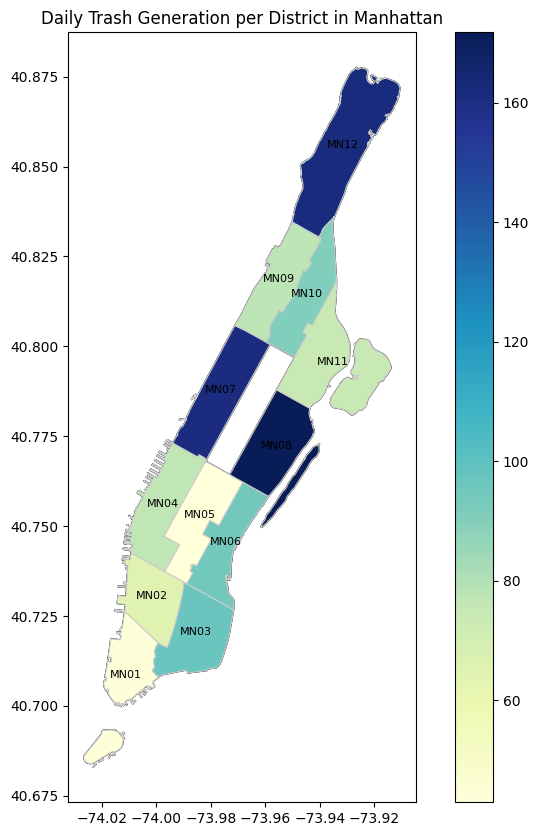

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point

# Load the daily trash generation data from means.pkl
means = pd.read_pickle("means.pkl")

# Load the shapefile for New York State districts (adjust path as necessary)
ny_districts = gpd.read_file("new/ny.shp")

# Filter for Manhattan districts MN01 through MN12
filtered_districts = ny_districts[ny_districts['district'].isin(
    ['MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10', 'MN11', 'MN12'])]

# Calculate the central point (centroid) of each district
filtered_districts['centroid'] = filtered_districts.geometry.centroid

# Map MN01-MN12 to numerical values 1-12 and sort by this mapping
district_mapping = {district: int(district[2:]) for district in filtered_districts['district'].unique()}
filtered_districts['new_district_id'] = filtered_districts['district'].map(district_mapping)
filtered_districts = filtered_districts.sort_values(by='new_district_id')

# Add the daily trash generation data to the district data
filtered_districts['daily_trash'] = means

# Plotting the districts with daily trash generation data
fig, ax = plt.subplots(figsize=(10, 10))
filtered_districts.plot(ax=ax, color='lightgrey', edgecolor='black')
filtered_districts.plot(column='daily_trash', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate with district labels at their centroids
for idx, row in filtered_districts.iterrows():
    plt.annotate(text=row['district'], xy=(row['centroid'].x, row['centroid'].y),
                 ha='center', fontsize=8, color='black')

plt.title("Daily Trash Generation per District in Manhattan")
plt.show()

/var/folders/ql/dklml2ln7dnf6l874y2q745w0000gn/T/ipykernel_27949/697079007.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_districts['centroid'] = filtered_districts.geometry.centroid
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/homebrew/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

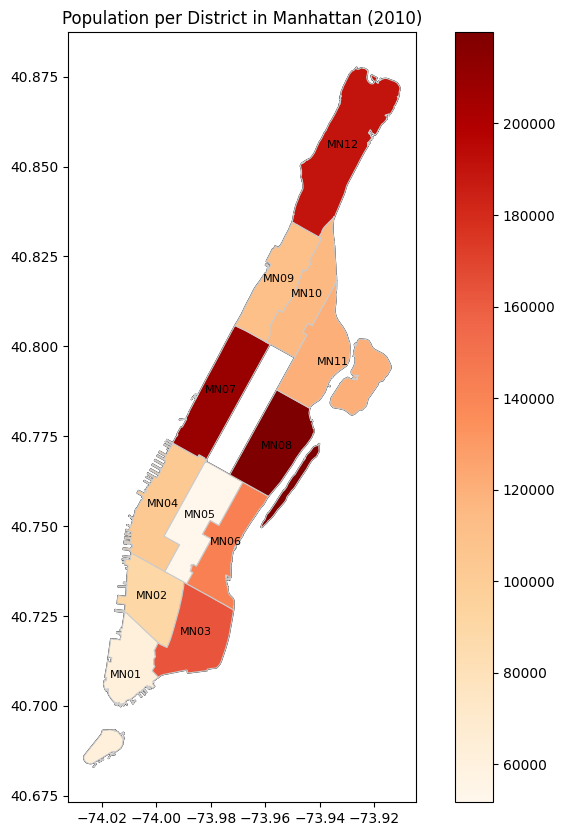

In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the Manhattan population data
population_data = pd.read_csv("ManhattonPopulation.csv")

# Filter and map district numbers to 1-12 for merging
population_data['new_district_id'] = population_data['CD Number']

# Load the shapefile for New York State districts (adjust path as necessary)
ny_districts = gpd.read_file("new/ny.shp")

# Filter for Manhattan districts MN01 through MN12
filtered_districts = ny_districts[ny_districts['district'].isin(
    ['MN01', 'MN02', 'MN03', 'MN04', 'MN05', 'MN06', 'MN07', 'MN08', 'MN09', 'MN10', 'MN11', 'MN12'])]

# Calculate the central point (centroid) of each district
filtered_districts['centroid'] = filtered_districts.geometry.centroid

# Map MN01-MN12 to numerical values 1-12 and sort by this mapping
district_mapping = {district: int(district[2:]) for district in filtered_districts['district'].unique()}
filtered_districts['new_district_id'] = filtered_districts['district'].map(district_mapping)
filtered_districts = filtered_districts.sort_values(by='new_district_id')

# Merge population data with the district GeoDataFrame, selecting population for the 2010 census
filtered_districts = filtered_districts.merge(population_data[['new_district_id', '2010 Population']],
                                              on='new_district_id', how='left')
filtered_districts.rename(columns={'2010 Population': 'population'}, inplace=True)

# Plotting the districts with 2010 population data
fig, ax = plt.subplots(figsize=(10, 10))
filtered_districts.plot(ax=ax, color='lightgrey', edgecolor='black')
filtered_districts.plot(column='population', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate with district labels at their centroids
for idx, row in filtered_districts.iterrows():
    plt.annotate(text=row['district'], xy=(row['centroid'].x, row['centroid'].y),
                 ha='center', fontsize=8, color='black')

plt.title("Population per District in Manhattan (2010)")
plt.show()